In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

e=pd.read_csv("combined_csv.csv")
f=pd.read_csv("train.csv")
g=pd.read_csv("reordered.csv")


In [0]:
x=e.drop(['UnitPrice','InvoiceDate','InvoiceNo','Country','Quantity','CustomerID'],axis=1)

In [0]:
w=x['StockCode'].sort_values(0).unique()


In [0]:
w=pd.DataFrame({'StockCode': w})

In [0]:
w['List Index'] = w.index

In [0]:
u=np.unique(list(f['CustomerID']))
v=np.unique(list(g['CustomerID']))

In [0]:
e['Values']=e['Quantity']*e['UnitPrice']

In [0]:
e=e.drop(['UnitPrice','InvoiceDate','InvoiceNo','Country','Quantity'],axis=1)

In [0]:
e=e.groupby(['CustomerID','StockCode'],as_index=False).sum()

In [0]:
e=e.drop([69433,73591,79740,143632])

In [11]:
e.sort_values(by=['Values'])

,CustomerID,StockCode,Values
74253,103599,85123AY,-4791.92
74165,103599,48185J,-4522.50
114361,158238,23113X,-3825.36
73599,103599,21175V,-3700.00
60042,84519,22273M,-3471.35
74160,103599,47566BG,-3315.00
292197,410886,22328M,-1578.81
274413,383616,22423U,-1451.25
155559,214578,23284M,-1416.00
275796,384606,85123AY,-1275.00


In [0]:
df_matrix = pd.pivot_table(e, values='Values', index='CustomerID', columns='StockCode')

In [0]:
df_matrix_na = df_matrix.fillna(0)

In [0]:
df_matrix_norm = (df_matrix-df_matrix_na.values.min())/(df_matrix_na.values.max()-df_matrix_na.values.min())

In [15]:
df_matrix_norm

StockCode,10002F,10080Q,10120M,10123CU,10124AW,10124GF,10125J,10133M,10135P,11001M,15030G,15034D,15036Z,15039A,15044AR,15044BI,15044CR,15044DX,15056BLH,15056ND,15056PV,15056blG,15056nO,15056pC,15058AY,15058BR,15058CH,15060BB,15060bU,16008I,16010H,16011L,16012X,16014F,16015Z,16016H,16020CF,16033Z,16043M,16045M,...,90205AR,90205CD,90206AQ,90206CD,90208D,90209AX,90209BE,90209CQ,90210AL,90210BN,90210CN,90210DP,90211AP,90211BD,90212BG,90212CC,90214AQ,90214BW,90214CK,90214DZ,90214EF,90214FX,90214GF,90214HZ,90214IZ,90214JA,90214KK,90214LO,90214MZ,90214NM,90214OZ,90214PB,90214RZ,90214SF,90214TT,90214UO,90214VD,90214WH,90214YL,90214ZJ
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.359026,0.359026,NaN,NaN,NaN,NaN,NaN,NaN,0.359176,0.359201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.369806,0.358827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.359917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358624,NaN,0.359451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358827,NaN,NaN,0.359451,NaN,NaN,NaN,NaN,NaN,NaN,0.372829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3600,NaN,0.358990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.362311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_new1_na = df_matrix_norm[df_matrix_norm.index.isin(u)].fillna(0)

In [0]:
df_new2_na = df_matrix_norm[df_matrix_norm.index.isin(v)].fillna(0)

In [0]:
df_new11 = df_new1_na.stack().reset_index(name='Values')
df_new22 = df_new2_na.stack().reset_index(name='Values')

In [0]:
df_new111= df_new11.merge(w, on='StockCode')
df_new222 = df_new22.merge(w, on='StockCode')

In [20]:
df_new111

,CustomerID,StockCode,Values,List Index
0,0,10002F,0.0,0
1,900,10002F,0.0,0
2,1800,10002F,0.0,0
3,2790,10002F,0.0,0
4,4590,10002F,0.0,0
5,5400,10002F,0.0,0
6,6300,10002F,0.0,0
7,6390,10002F,0.0,0
8,7200,10002F,0.0,0
9,7290,10002F,0.0,0


In [21]:
df_new222

,CustomerID,StockCode,Values,List Index
0,1890,10002F,0.000000,0
1,2700,10002F,0.000000,0
2,3600,10002F,0.000000,0
3,3690,10002F,0.000000,0
4,4500,10002F,0.000000,0
5,5490,10002F,0.000000,0
6,8190,10002F,0.000000,0
7,9090,10002F,0.000000,0
8,13680,10002F,0.000000,0
9,14490,10002F,0.000000,0


In [0]:
df_new1 = df_new111.sort_values(by =['CustomerID', 'List Index'])
df_new2 = df_new222.sort_values(by =['CustomerID', 'List Index'])

In [23]:
df_new1.sort_values(by=['Values'],ascending=False)

,CustomerID,StockCode,Values,List Index
2033873,242658,23243L,1.000000,2092
356457,386406,21108Z,0.945670,366
973959,12690,22086O,0.790198,1002
3288009,386406,85123AY,0.778050,3383
2617159,277227,48185J,0.764685,2693
2617329,386406,48185J,0.741215,2693
3084837,371826,84879M,0.738377,3174
1258882,69930,22413V,0.708211,1295
1908485,242658,23113X,0.702009,1963
1188597,460836,22328M,0.699190,1222


In [24]:
userGroup = df_new1.groupby('CustomerID')
userGroup.first().head()

,StockCode,Values,List Index
CustomerID,,,
0,10002F,0.0,0
900,10002F,0.0,0
1800,10002F,0.0,0
2790,10002F,0.0,0
4590,10002F,0.0,0


In [0]:
#for key, item in userGroup:
   # print(userGroup.get_group(key), "\n\n")

In [0]:
amountOfUsedUsers = 972
#Creating the training list
train_X = []
#For each user in the group
for userID, curUser in userGroup:
    #Create a temp that stores every stock's value
    temp = [0]*len(w)
    #For each stock in curUser's stock list
    for num, movie in curUser.iterrows():
        # store it
        temp[movie['List Index']] = movie['Values']
    #Now add the list of values into the training list
    train_X.append(temp)
    #Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1

In [27]:
len(train_X[971])

3860

In [0]:
hiddenUnits = 3860
visibleUnits = len(w)
vb = tf.placeholder("float", [visibleUnits]) #Number of unique stocks
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

In [0]:
v0 = tf.placeholder("float", [None, visibleUnits])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [0]:
#Learning rate
alpha = 0.1
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

In [0]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [0]:
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

0.030840028
0.032065246
0.033647906
0.03442878
0.034682374
0.034329414
0.03467622
0.034251727
0.033742607
0.033430353
0.03317684
0.03275297
0.03241648
0.03230163
0.031758435
0.03176326
0.031739973
0.031569812
0.03119176
0.030894829
0.03102155
0.030570844
0.030530844
0.03037069
0.030017689
0.029742112
0.029860212
0.029363556
0.029499222
0.029452141
0.028962018
0.0292111
0.028978746
0.028867865
0.028589059
0.02838253
0.02811392
0.028394591
0.028055808
0.02806983


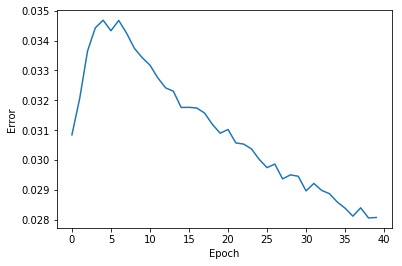

In [61]:
epochs = 40
batchsize = 20
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(train_X), batchsize), range(batchsize, len(train_X), batchsize)):
        batch = train_X[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    errors.append(sess.run(err_sum, feed_dict={v0: train_X, W: cur_w, vb: cur_vb, hb: cur_nb}))
    print (errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [62]:
testGroup = df_new2.groupby('CustomerID')
testGroup.first().head()

,StockCode,Values,List Index
CustomerID,,,
1890,10002F,0.0,0
2700,10002F,0.0,0
3600,10002F,0.0,0
3690,10002F,0.0,0
4500,10002F,0.0,0


In [0]:
amountOfUsedUsers = 628
#Creating the test list
test_X = []
#For each user in the group
for userID, curUser in testGroup:
    #Create a temp that stores every stock's value
    temp = [0]*len(w)
    #For each movie in curUser's stock list
    for num, movie in curUser.iterrows():
        # store it
        temp[movie['List Index']] = movie['Values']
    #Now add the list of values into the test list
    test_X.append(temp)
    #Check to see if we finished adding in the amount of users for testing
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1

In [0]:
ye=[]
bia=[]
bibi=[]

In [0]:
for i in range(len(v)):
  
  inputUser = [test_X[i]]

  hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
  vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
  feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hb: prv_hb})
  rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})

  scored_df_75 = w
  scored_df_75["Recommendation Score"] = rec[0]
  #scored_df_75.sort_values(["Recommendation Score"], ascending=False).head(1)

  l = df_new222.CustomerID[i]

  #df_new222.iloc[606]
  w_75 = df_new222[df_new222['CustomerID']==l]
  #w_75.head()
  #Merging movies_df with ratings_df by MovieID
  merged_data_75 = scored_df_75.merge(w_75, on='StockCode', how='outer')
  #Dropping unecessary columns
  merged_data_75 = merged_data_75.drop('List Index_y', axis=1).drop('CustomerID', axis=1)
  k = merged_data_75.sort_values(["Recommendation Score"], ascending=False)
  final = ( k[k.Values==0].head(1) ).StockCode

  #final
  bia = final.tolist()
  bibi.append(bia)
  #bibi

  ye.append(l)

In [0]:
#bia=[]

In [0]:
finale = pd.DataFrame({'CustomerID':ye , 'Items':bibi})

In [55]:
finale

,CustomerID,Items
0,1890,[23084M]
1,2700,[85099BJ]
2,3600,[22197J]
3,3690,[22423U]
4,4500,[23084M]
5,5490,[23084M]
6,8190,[22423U]
7,9090,[23084M]
8,13680,[23084M]
9,14490,[23084M]


In [0]:
finale.to_csv('submission.csv', index=False)

In [43]:
finale['Items']

0       [22720A]
1       [22865Y]
2       [22720A]
3       [21930O]
4      [85099BJ]
5       [22720A]
6       [20725N]
7       [20725N]
8       [22720A]
9       [20725N]
10      [22720A]
11      [22720A]
12      [22720A]
13      [22910D]
14      [20725N]
15      [22720A]
16      [21930O]
17      [22720A]
18     [85099BJ]
19      [22720A]
20      [20725N]
21      [22720A]
22      [22720A]
23      [22720A]
24      [22720A]
25      [20725N]
26      [20725N]
27      [22720A]
28      [22720A]
29      [22720A]
         ...    
598     [22720A]
599     [20725N]
600     [22720A]
601     [22720A]
602     [22720A]
603     [22720A]
604     [22720A]
605     [22720A]
606     [22720A]
607     [22720A]
608     [22720A]
609     [20725N]
610     [20725N]
611     [23300F]
612     [22720A]
613     [20725N]
614     [23300F]
615     [22720A]
616     [22720A]
617     [22720A]
618     [22720A]
619     [22720A]
620     [22720A]
621     [22720A]
622     [22910D]
623     [22720A]
624     [22720A]
625     [22720